In [1]:
import shutil

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
import folium
import json

In [4]:
df_car=pd.read_csv('자동차등록집계현황.csv',encoding='euc-kr')

In [5]:
df_car['시군구명']=df_car['시군구명'].str.replace(' ','')

In [6]:
df_car=df_car.set_index('시군구명')

In [7]:
try:
    geo_data=json.load(open('경기도행정구역경계.json', encoding="utf-8"))
except:
    geo_data=json.load(open('경기도행정구역경계.json', encoding="utf-8-sig"))

g_map = folium.Map(location=[37.5502, 126.982], 
                   zoom_start=11)
folium.Choropleth(geo_data=geo_data,
                 data=df_car['총계'],
                 columns=[df_car.index, df_car['총계']],
                 fill_color='YlOrRd',
                 fill_opacity=0.7,
                 line_opacity=0.3,
                 key_on='feature.properties.name'
                 ).add_to(g_map)
g_map.save('gg_car_map.html')

In [8]:
df_cctv=pd.read_csv('CCTV현황(개방표준).csv',encoding='euc-kr')

In [9]:
df_cctv.head(3)

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,경기도 가평군청,경기도 가평군 가평읍 당목가일길 211-80,경기도 가평군 가평읍 개곡리 705번지,생활방범,4,200.0,120도,30.0,NaN,031-582-1191,37.870545,127.5376575,2019-05-10
1,경기도 가평군청,NaN,경기도 가평군 가평읍 개곡리 964(개곡교),생활방범,2,200.0,도로방면,30.0,NaN,031-580-2571,37.864426,127.5301553,2019-05-10
2,경기도 가평군청,NaN,경기도 가평군 가평읍 개곡리 산 334(경춘공원),쓰레기단속,1,200.0,360도전방면,30.0,NaN,031-580-2550,37.834013,127.5063827,2019-05-10


In [10]:
df_cctv[df_cctv['위도'].isna()]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
644,경기도 고양시,NaN,경기도 고양시 일산동구 제2~3주차장사이,교통단속,3,130.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
938,경기도 고양시,NaN,경기도 고양시 일산동구 굿모닝법조타운앞,교통단속,1,52.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1227,경기도 고양시,NaN,경기도 고양시 일산동구 흰돌마을3단지,교통단속,1,52.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1228,경기도 고양시,NaN,경기도 고양시 일산동구 백석성당,교통단속,1,52.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1229,경기도 고양시,NaN,경기도 고양시 일산동구 청석골앞,교통단속,1,41.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1230,경기도 고양시,NaN,경기도 고양시 일산동구 현대밀라트2차앞,교통단속,1,41.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1231,경기도 고양시,NaN,경기도 고양시 일산동구 한국전력공사앞,교통단속,1,41.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1318,경기도 고양시,NaN,경기도 고양시 일산동구 홈플러스 후문 사거리,교통단속,5,200.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1383,경기도 고양시,NaN,경기도 고양시 일산동구 고봉로 (호수삼거리),교통단속,5,130.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01
1417,경기도 고양시,NaN,경기도 고양시 일산동구 제3주차장앞,교통단속,5,130.0,NaN,30.0,NaN,031-8075-2578,NaN,NaN,2018-01-01


In [11]:
df_cctv['위도']=df_cctv['위도'].fillna(method='pad')

In [12]:
df_cctv['경도']=df_cctv['경도'].fillna(method='pad')

In [13]:
df_cctv['경도']=df_cctv['경도'].str.replace('-','.')

In [14]:
df_cctv['경도'].astype('float')

0        127.537657
1        127.530155
2        127.506383
3        127.549835
4        127.466377
            ...    
37964    127.013257
37965    127.045474
37966    126.981625
37967    126.998172
37968    127.018531
Name: 경도, Length: 37969, dtype: float64

In [15]:
df_cctv['관리기관명']=df_cctv['관리기관명'].str.replace("경기도 ",'')

In [16]:
df_cctv['시군']=df_cctv['소재지지번주소'].str[4:7]

In [17]:
indexs=df_cctv[df_cctv['시군'].isna()].index

In [18]:
indexs

Int64Index([ 4020,  4021,  4024,  4027,  4047,  4049,  4050,  4091,  4094,
             4096,
            ...
            33122, 33191, 33194, 33211, 33215, 33220, 33221, 33564, 33569,
            33686],
           dtype='int64', length=120)

In [19]:
siguns=list(df_cctv[df_cctv['시군'].isna()]['소재지도로명주소'].str[4:7].copy())
siguns

['101',
 '102',
 '181',
 '51-',
 '101',
 '761',
 '761',
 '973',
 '05-',
 '137',
 '72-',
 '181',
 '181',
 '181',
 '181',
 '7-1',
 '908',
 '638',
 '967',
 '36-',
 '1-5',
 '62-',
 '80-',
 '49',
 '150',
 '111',
 '154',
 '150',
 '181',
 '05-',
 '71-',
 '34-',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '의정부',
 '의정부',
 '의정부',
 '의정부',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시']

In [20]:
for i in range(120):
    if ('시' in siguns[i] or '군' in siguns[i]) and ' ' not in siguns[i]:
        df_cctv.loc[indexs[i],'시군']=siguns[i]

In [21]:
df_cctv.drop(df_cctv[df_cctv['시군']=='시 금'].index,inplace=True)

In [22]:
df_cctv

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,시군
0,가평군청,경기도 가평군 가평읍 당목가일길 211-80,경기도 가평군 가평읍 개곡리 705번지,생활방범,4,200.0,120도,30.0,NaN,031-582-1191,37.870545,127.5376575,2019-05-10,가평군
1,가평군청,NaN,경기도 가평군 가평읍 개곡리 964(개곡교),생활방범,2,200.0,도로방면,30.0,NaN,031-580-2571,37.864426,127.5301553,2019-05-10,가평군
2,가평군청,NaN,경기도 가평군 가평읍 개곡리 산 334(경춘공원),쓰레기단속,1,200.0,360도전방면,30.0,NaN,031-580-2550,37.834013,127.5063827,2019-05-10,가평군
3,가평군청,NaN,경기도 가평군 가평읍 개곡리 산 344(줄길리 마을입구),생활방범,2,200.0,도로방면,30.0,NaN,031-580-2571,37.848283,127.5498354,2019-05-10,가평군
4,가평군청,NaN,경기도 가평군 가평읍 경반리 산 151-3(짚라인가평입구),생활방범,1,200.0,도로방면,30.0,NaN,031-580-2571,37.834490,127.4663768,2019-05-10,가평군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37964,화성시-스마트시티과,NaN,경기도 화성시 송산동 164-25,생활방범,4,200.0,360도전방면,30.0,2016-07,031-5189-3528,37.208829,127.0132572357,2019-12-16,화성시
37965,화성시-스마트시티과,경기도 화성시 기산말길 93-1,경기도 화성시 기산동 235-2,생활방범,3,200.0,360도전방면,30.0,2015-12,031-5189-3528,37.225131,127.0454736213,2019-12-16,화성시
37966,화성시-스마트시티과,NaN,경기도 화성시 안녕동 180-25,생활방범,3,200.0,120도전방면,30.0,2019-04,031-5189-3528,37.208909,126.9816245136,2019-12-16,화성시
37967,화성시-스마트시티과,NaN,경기도 화성시 배양동 44-3,생활방범,3,200.0,360도전방면,30.0,2015-12,031-5189-3528,37.225553,126.9981720828,2019-12-16,화성시


In [23]:
indexs2=df_cctv[df_cctv['시군'].isna()].index

In [24]:
for x in indexs2:    
    df_cctv.loc[x,['시군']]='군포시'

In [25]:
df_cctv[df_cctv['시군'].isna()]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,시군


In [26]:
df_city=list(df_cctv['시군'].unique())

In [27]:
for x in df_city:
    df_temp=df_cctv[df_cctv['시군']==x]
    temp_map=folium.Map(location=[37.55, 126.98], zoom_start=11)
    for name, lat, lng in zip(df_temp.iloc[0:,0], df_temp['위도'], df_temp['경도']):
        folium.Marker([lat,lng], popup=name).add_to(temp_map)
    temp_map.save(x+"map.html")

In [28]:
import shutil

In [29]:
# shutil.move('C:/Users/i7B/Downloads/서울화재현황.txt','서울화재현황.txt')

In [30]:
df_fire=pd.read_csv('서울화재현황.txt',sep='\t')

In [31]:
df_fire.head(5)

,기간,자치구,발생,발생.1,발생.2,발생.3,소실,소실.1,소실.2,피해액,피해액.1,피해액.2,재산피해경감액,인명피해,인명피해.1,인명피해.2,이재민수,구조인원
0,기간,자치구,합계,실화,방화,기타,동수(동),이재가구수(가구),면적(㎡),합계,부동산,동산,재산피해경감액,합계,사망,부상,이재민수,구조인원
1,2017,합계,"5,978","5,346",123,509,668,71,"85,590","15,323,890","6,592,363","8,731,527","780,427,721",283,37,246,148,794
2,2017,종로구,234,197,6,31,13,9,832,"1,077,665","193,128","884,537","7,859,982",4,1,3,20,16
3,2017,중구,198,177,3,18,34,13,"1,077","485,392","199,688","285,704","6,129,751",19,5,14,14,17
4,2017,용산구,167,145,-,22,6,7,620,"262,910","112,190","150,720","14,355,773",6,-,6,22,8


In [32]:
df_fire.columns=df_fire.iloc[0,:]

In [33]:
df_fire=df_fire.drop(0)

In [34]:
df_fire=df_fire[['기간','자치구','합계']]

In [35]:
df_fire.head()

,기간,자치구,합계,합계,합계
1,2017,합계,"5,978","15,323,890",283
2,2017,종로구,234,"1,077,665",4
3,2017,중구,198,"485,392",19
4,2017,용산구,167,"262,910",6
5,2017,성동구,197,"621,324",12


In [36]:
df_fire.tail()

,기간,자치구,합계,합계,합계
48,2018,관악구,337,"816,562",21
49,2018,서초구,242,"848,067",15
50,2018,강남구,436,"1,624,983",23
51,2018,송파구,340,"970,251",28
52,2018,강동구,324,"540,625",19


In [37]:
df_fire=df_fire.iloc[1:,:3]

In [38]:
pivot_fire=df_fire.pivot(index='자치구',columns='기간',values='합계').copy()

In [39]:
pivot_fire=pivot_fire.iloc[:-1,:]

In [40]:
pivot_fire.head()

기간,2017,2018
자치구,,
강남구,502,436
강동구,269,324
강북구,186,203
강서구,364,383
관악구,286,337


In [41]:
pivot_fire['2017']=pivot_fire['2017'].astype('float').copy()
pivot_fire['2018']=pivot_fire['2018'].astype('float').copy()

In [42]:
pivot_fire['증감률']=(pivot_fire['2018']/pivot_fire['2017']-1)*100

In [43]:
pivot_fire.sort_values('증감률',inplace=True)

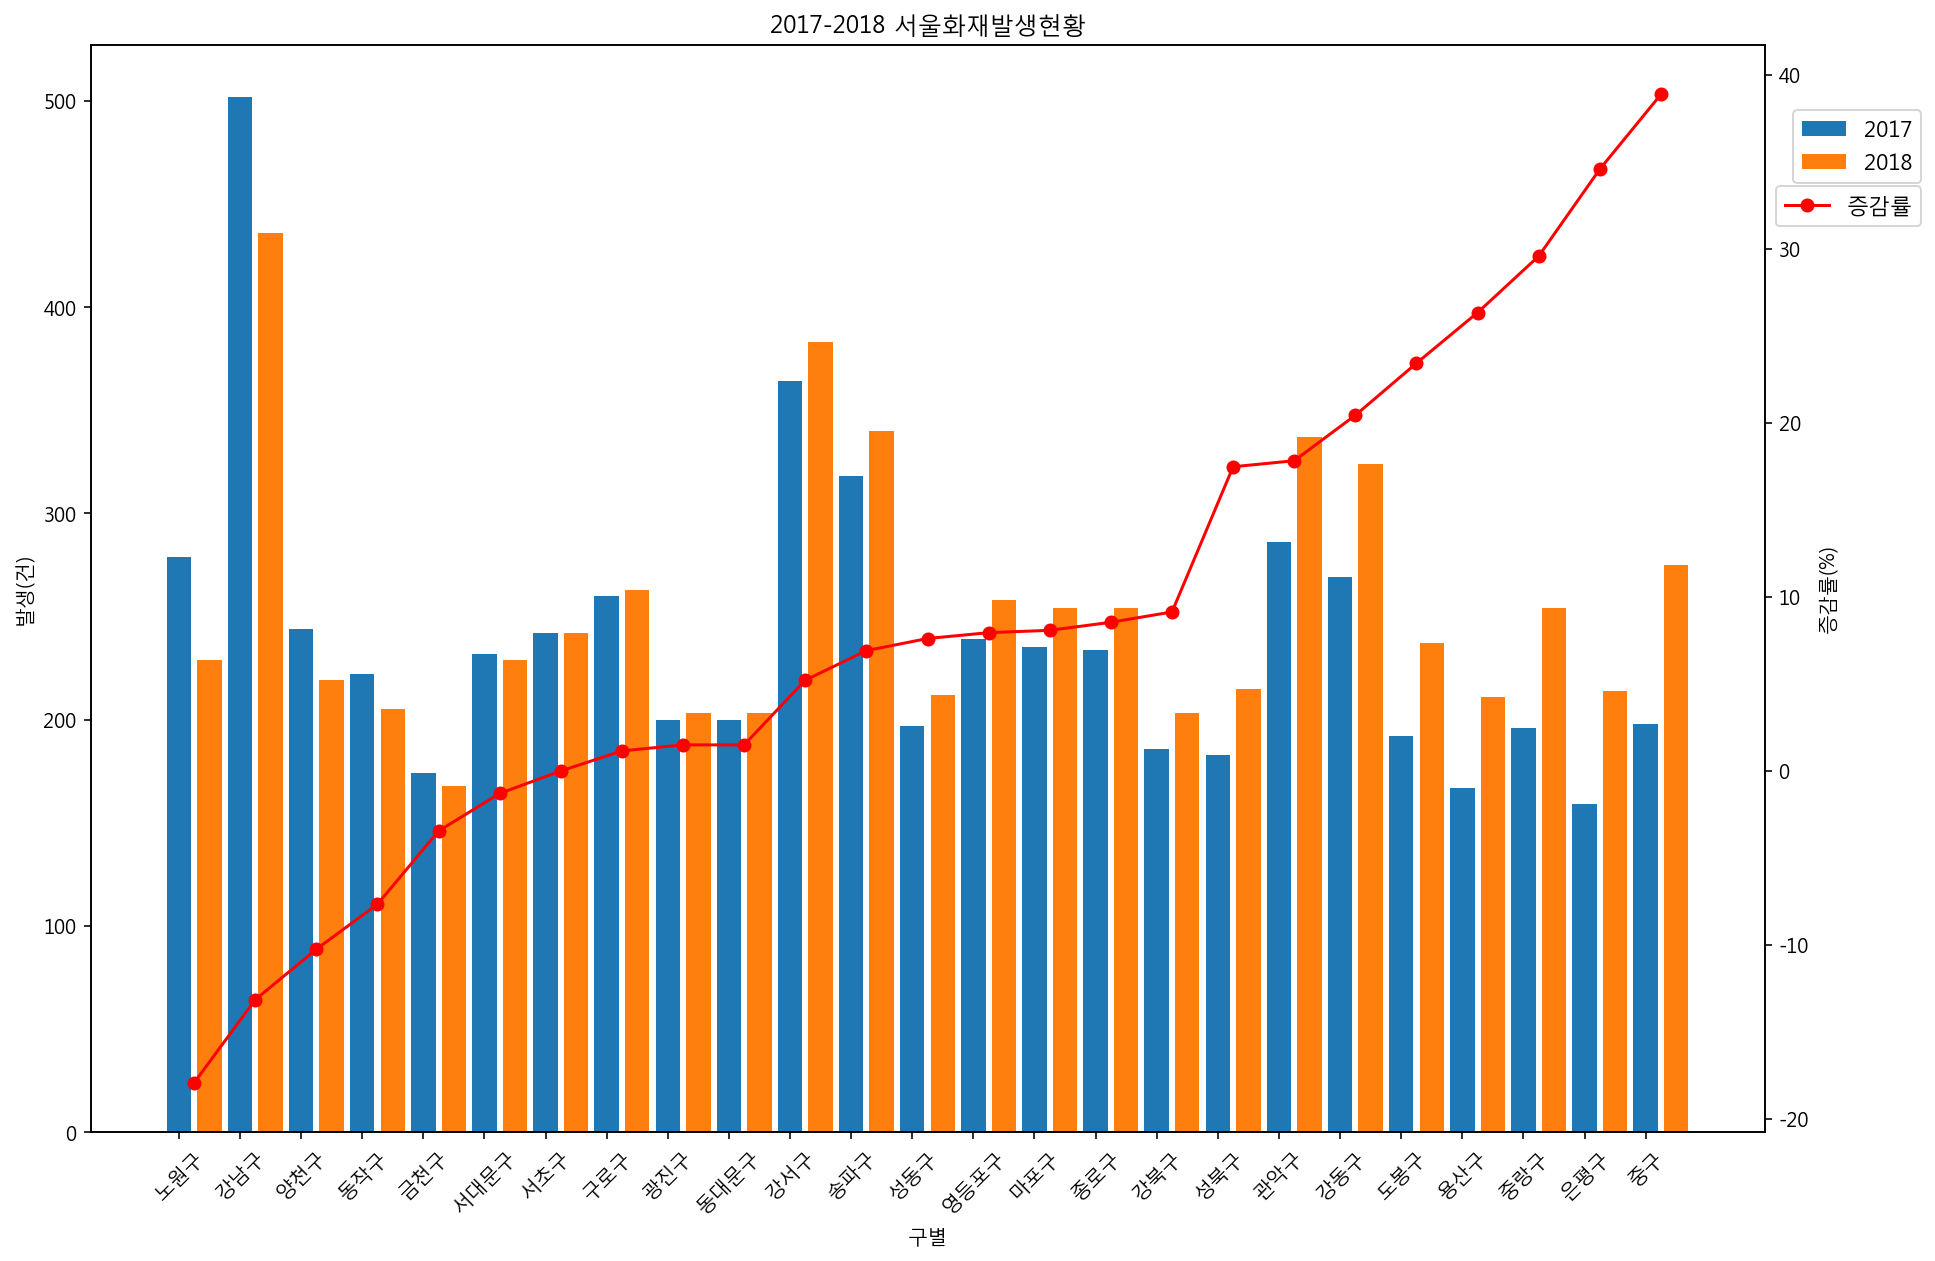

In [44]:
fig=plt.figure(figsize=(15,10))
ax1=plt.subplot()
ax1.bar(x=[x*2 for x in range(25)],height=pivot_fire['2017'],tick_label=pivot_fire.index)
ax1.bar(x=[x*2+1 for x in range(25)],height=pivot_fire['2018'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax2=ax1.twinx()
ax2.plot([x*2+0.5 for x in range(25)],pivot_fire['증감률'],marker='o',color='red')

ax1.legend(['2017','2018'],bbox_to_anchor=(1.1,0.95),fontsize=11)
ax2.legend(['증감률'],bbox_to_anchor=(1.1,0.88),fontsize=11)

plt.title('2017-2018 서울화재발생현황')
plt.xlabel('구별')
ax1.set_ylabel('발생(건)')
ax2.set_ylabel('증감률(%)')
ax1.set_xlabel('구별')
plt.savefig('서울화재현황')
plt.show()